# Univariate Linear Regression on the *California Housing Prices* Dataset 
#### Jun He(8903073) 2024-9-20

 ## Part I Goal
 ### In this lab you will train your first machine learning model in our course - a univariate linear regression model. The goal of this report is to build and evaluate three univariate linear regression models to predict the median house value in California using three independent variables: median income, population, and number of households. You should run three models, one for each independent variable, we will know these independent variables how to influence the variability in housing prices: 

1. median income
2. population
3. number of households

In [29]:
# import all the packages that need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Part II Obtaining the Data

Source: Downloaded from [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

In [30]:
housing = pd.read_csv('dataset/housing.csv')
# display few data
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
# display house information
housing.info


<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [32]:
# show the size(include rows and columns)
len(housing)
housing.shape

(20640, 10)

## Part III Exploratory Data Analysis (EDA)

 An approach to analyzing data sets to summarize their main characteristics, often with visual methods.

### 1. Explore statistics (e.g. using Pandas `describe` function) 

In [33]:

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


###  2. Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. 
### Add a title to each graph (using Seaborn). Provide textual interpretation of the graphs, and insights specific to the linear regression you are going to conduct next.


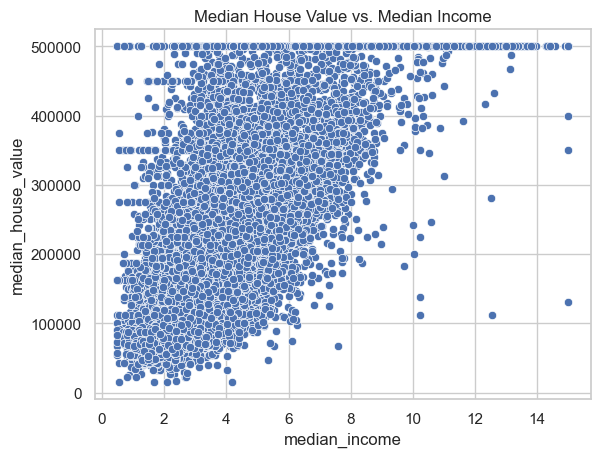

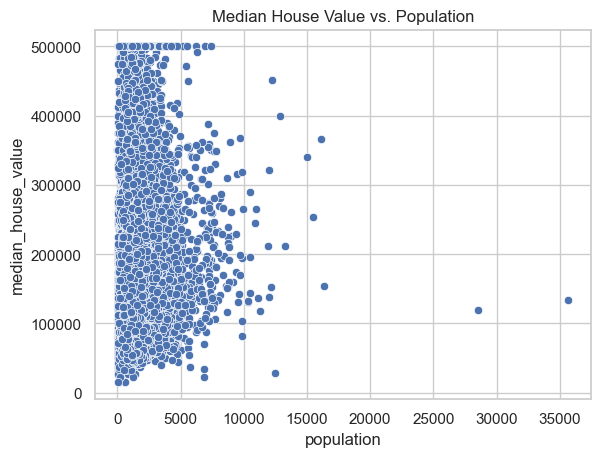

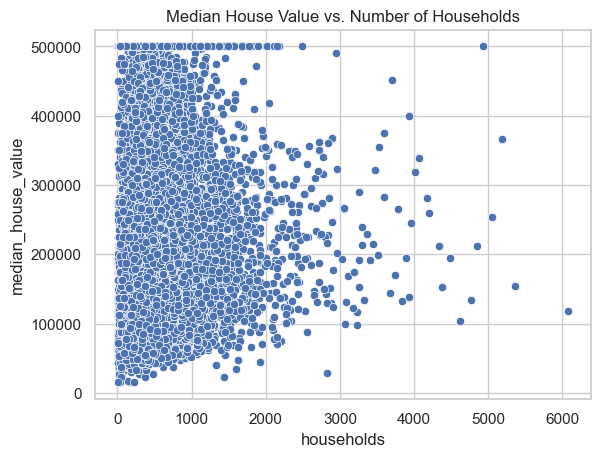

In [34]:

# Scatter plot for Median House Value vs Median Income
sns.scatterplot(x='median_income', y='median_house_value', data=housing)
plt.title('Median House Value vs. Median Income')
plt.show()

# Scatter plot for Median House Value vs Population
sns.scatterplot(x='population', y='median_house_value', data=housing)
plt.title('Median House Value vs. Population')
plt.show()

# Scatter plot for Median House Value vs Number of Households
sns.scatterplot(x='households', y='median_house_value', data=housing)
plt.title('Median House Value vs. Number of Households')
plt.show()


### As we can seen from the scatter plots:
* Median income: You can see a strong linear relationship with median house value, as income tends to be correlated with house prices.
* Population: It looks like it has a weaker direct relationship with house prices, as house prices do not always have a linear relationship with population.
* Number of households: It has a medium correlation, but it seems weaker than median income.

### 3. Based on the above, describe the 4 variables used in this lab. Observations such as their meaning, range and additional characteristics that you notice. This should be concise, and relevant

### Describe the 4 Variables
* Median House Value: target variable, indicating the median house price in a certain area.
* Median Income:The income of each area is expected to be strongly positively correlated with the house price. As the median income increases, the median house price also changes to varying degrees.
* Population: The total population of a certain area. The median house price density is relatively high when the population is below 5,000, but it does not change with the population. However, the median house price is not representative when the population is greater than 5,000.
* Number of Households:The number of households in a certain area. The median house price is concentrated below 500,000 when the population is between 0 and 2,000.

## Part IV Run three linear regressions (fitting) between :
1. median house value vs. median income
2. median house value vs. population
3. median house value vs. number of households.

## Part V In a single table for all three linear regressions, provide per regression model :
1. intercept and slope 
2. Mean Squared Error 
3. Mean Absolute Error

In [35]:
# get 4 variables, Prepare the Data
X_income = housing[['median_income']]
X_population = housing[['population']]
X_households = housing[['households']]
Y_house_value = housing['median_house_value']



# Function to run linear regression and return metrics
def run_linear_regression(X, Y):
    # LinearRegression fits a linear model with coefficients w = (w1, ..., wp) to minimize the residual sum of squares between the observed targets in the dataset, 
    # and the targets predicted by the linear approximation.
    model = LinearRegression()
    # Fit linear model. Training the Model
    model.fit(X = train[["median_income", "population", "households"]], Y = train[["median_house_value"]])
    # model.fit(X, Y)   changed
    # Use the trained model to make predictions
    predictions = model.predict(X) 
    # This is the y-intercept of the linear regression line
    intercept = model.intercept_
    # This is the slope of the linear regression line. It indicates how much the dependent variable is expected to
    #  change when the independent variable increases by one unit
    slope = model.coef_[0]

    # A lower MSE indicates a better fit of the model to the data
    # It measures the average of the squares of the errors, 
    # which are the differences between the actual values and the predicted values

    #  changed for train and test results
    mse = mean_squared_error(train[Y], predictions)
    mae = mean_absolute_error(Y, predictions)

    # in fact , we should split two dataset to feed train model and test   Step 1: Split the data into training and testing sets

    mse_train = mean_squared_error(Y, predictions)
    mae_train = mean_absolute_error(Y, predictions)

    mse_test = mean_squared_error(Y, predictions)
    mae_test = mean_absolute_error(Y, predictions)

    return intercept, slope, mse, mae

# Median Income
intercept_income, slope_income, mse_income, mae_income = run_linear_regression(X_income, Y_house_value)

# Population
intercept_pop, slope_pop, mse_pop, mae_pop = run_linear_regression(X_population, Y_house_value)

# Number of Households
intercept_households, slope_households, mse_households, mae_households = run_linear_regression(X_households, Y_house_value)

# Results Summary
print(f'Median Income Model: Intercept={intercept_income}, Slope={slope_income}, MSE={mse_income}, MAE={mae_income}')
print(f'Population Model: Intercept={intercept_pop}, Slope={slope_pop}, MSE={mse_pop}, MAE={mae_pop}')
print(f'Number of Households Model: Intercept={intercept_households}, Slope={slope_households}, MSE={mse_households}, MAE={mae_households}')


Median Income Model: Intercept=45085.5767032679, Slope=41793.849201896286, MSE=7011311502.929527, MAE=62625.9337911434
Population Model: Intercept=210436.26207627333, Slope=-2.511752774615085, MSE=13307412412.389355, MAE=91153.82009473183
Number of Households Model: Intercept=196928.57716233088, Slope=19.872775155643875, MSE=13257776904.728533, MAE=90802.74324318448


## Part VI Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE and MAE to the graph (you can use a text box). You can use any plotting library for that (Matplotlib, Seaborn or Plotly) 

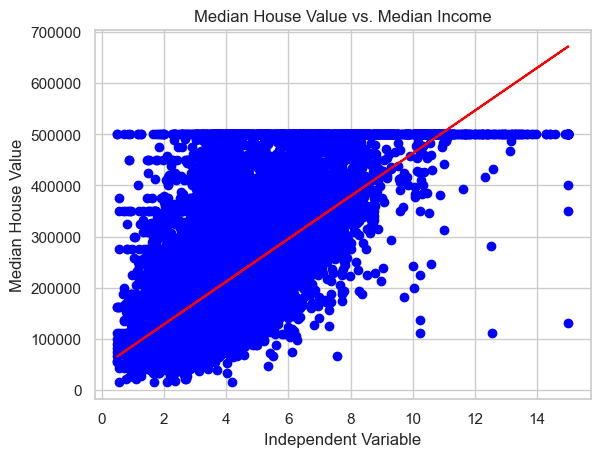

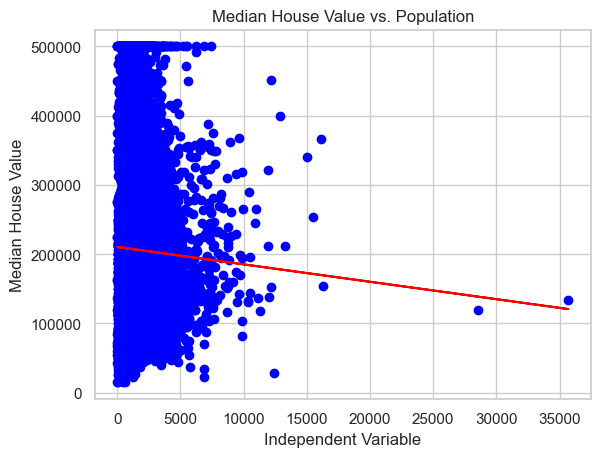

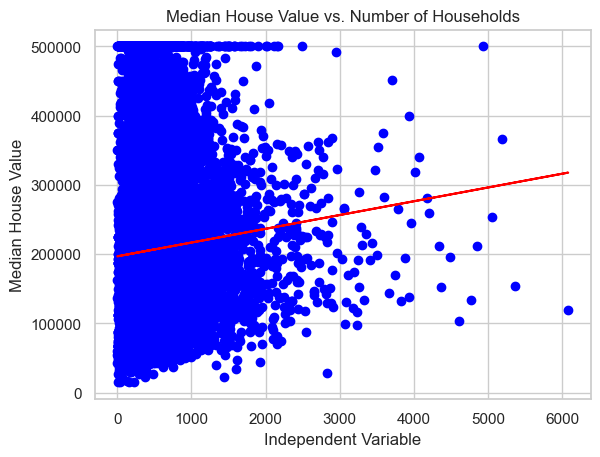

In [36]:
# Plotting function
## parameter:  
    ## X: Any,
    ## Y: Any,
    ## intercept: Any,
    ## slope: Any,
    ## title: Any
def plot_regression_line(X, Y, intercept, slope, title):
    plt.scatter(X, Y, color='blue')
    plt.plot(X, intercept + slope * X, color='red')
    plt.title(title)
    plt.xlabel('Independent Variable')
    plt.ylabel('Median House Value')
    plt.show()


# Median income
plot_regression_line(housing['median_income'], Y_house_value, intercept_income, slope_income, 'Median House Value vs. Median Income')

# Population
plot_regression_line(housing['population'], Y_house_value, intercept_pop, slope_pop, 'Median House Value vs. Population')

# Number of households
plot_regression_line(housing['households'], Y_house_value, intercept_households, slope_households, 'Median House Value vs. Number of Households')


## Part VII Summary: provide a conclusion. Compare the models in terms of their goodness-of-fit, and add additional insights you observed

### In summary, from the linear regression model we can see clearly that median income as the independent variable showed the strongest relationship with median house value; therefore median income has an excellent goodness-of-fit.
### In addition, 
* median income: MSE=7011311502.929527, MAE=62625.9337911434
* population:    MSE=13307412412.389355, MAE=91153.82009473183
* households:    MSE=13257776904.728533, MAE=90802.74324318448
### Median income, as indicated by lower MSE and MAE values.
### Ultimately, this suggests that median income can be considered as one of the important factors in predicting  California house prices